# Data Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
# read csv files
combined_df = pd.read_csv('clean_data/combined_gas_and_temp.csv')
combo_pop = pd.read_csv('clean_data/combined_w_pop.csv')

In [3]:
# droping the extra index column that gets added from importing csv
combined_df.drop(columns='Unnamed: 0', inplace=True)
combo_pop.drop(columns='Unnamed: 0', inplace=True)

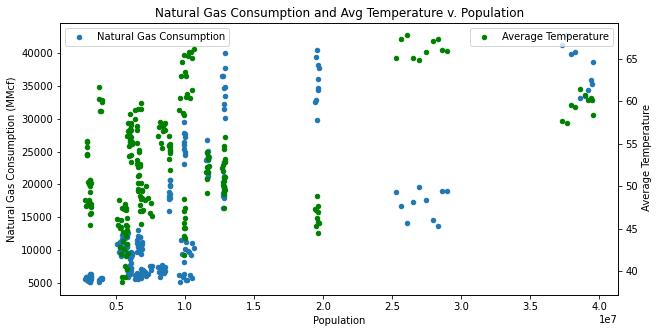

In [4]:
# plot gas consumption first
ax1 = combo_pop.plot(kind='scatter', x='Population', y='Natural Gas Consumption (MMcf)', figsize=(10, 5), label='Natural Gas Consumption')
# add twin axis and set the position of y ticks for temperature data
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
# plot temperature data
combo_pop.plot(kind='scatter', ax=ax2, x='Population', y=' Average Temperature', color='green', label='Average Temperature')

# set title, legend, and save figure to png
title = ax1.set_title('Natural Gas Consumption and Avg Temperature v. Population')
leg = ax1.legend()
fig = ax1.get_figure()
fig.savefig('output_data/gas_and_temp_v_population.png')

# Linear Regression Models

In [5]:
# function to plot linear regressions
def plotLinRegress(x, y, xlabel, ylabel, labelpos, title, image_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f'The r-squared is: {rvalue**2}')
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, labelpos, fontsize=15, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(f'output_data/{image_name}.png')

The r-squared is: 0.007137961012774229


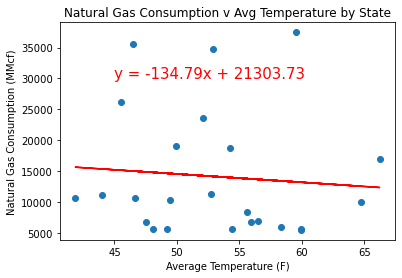

In [6]:
# get the averages over a 10 year period
state_mean = combo_pop.groupby('State').mean()

xlabel = 'Average Temperature (F)'
ylabel = 'Natural Gas Consumption (MMcf)'
title = 'Natural Gas Consumption v Avg Temperature by State'
labelpos = (45, 30000)
image_name = 'gas_usage_v_temp_by_state'

plotLinRegress(state_mean[' Average Temperature'], state_mean['Natural Gas Consumption (MMcf)'], xlabel, ylabel, labelpos, title, image_name)

The r-squared is: 0.15178578510370927


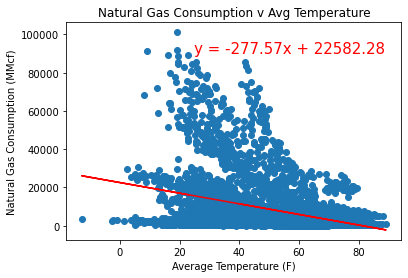

In [7]:
xlabel = 'Average Temperature (F)'
ylabel = 'Natural Gas Consumption (MMcf)'
labelpos = (25,90000)
title = 'Natural Gas Consumption v Avg Temperature'
image_name = 'gas_usage_v_temp_total'

plotLinRegress(combined_df[' Average Temperature'], combined_df['Natural Gas Consumption (MMcf)'], xlabel, ylabel, labelpos,title, image_name)

The r-squared is: 0.5111068269975285


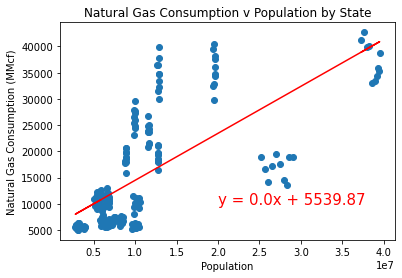

In [8]:
xlabel = 'Population'
ylabel = 'Natural Gas Consumption (MMcf)'
labelpos = (20000000, 10000)
title = 'Natural Gas Consumption v Population by State'
image_name = 'gas_usage_v_pop'

plotLinRegress(combo_pop['Population'], combo_pop['Natural Gas Consumption (MMcf)'], xlabel, ylabel, labelpos, title, image_name)

The r-squared is: 0.08072897389874303


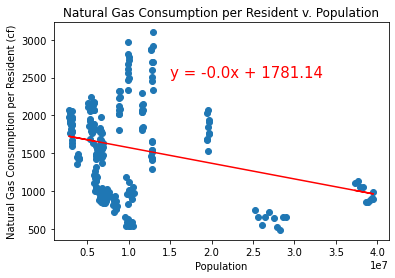

In [9]:
xlabel = 'Population'
ylabel = 'Natural Gas Consumption per Resident (cf)'
labelpos = (15000000, 2500)
title = 'Natural Gas Consumption per Resident v. Population'
image_name = 'gas_usage_per_person'
y = (combo_pop['Gas Usage Per Person (MMcf)']) * 1000000 # changes unit from million cubic feet to just cubic feet
plotLinRegress(combo_pop['Population'], y , xlabel, ylabel, labelpos, title, image_name)

The r-squared is: 0.4376100979010761


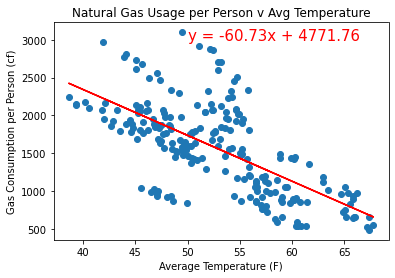

In [10]:
xlabel = 'Average Temperature (F)'
ylabel = 'Gas Consumption per Person (cf)'
labelpos = (50, 3000)
title = 'Natural Gas Usage per Person v Avg Temperature'
image_name = 'gas_usage_per_person_v_temp'
y = (combo_pop['Gas Usage Per Person (MMcf)']) * 1000000 # changes unit from million cubic feet to just cubic feet
plotLinRegress(combo_pop[' Average Temperature'], y, xlabel, ylabel, labelpos, title, image_name)

# Grouping States by Standard Federal Regions via .loc

In [11]:
Region_I= combined_df.loc[(combined_df['State']== 'Connecticut') | (combined_df['State']== 'Massachusetts')]

Region_II= combined_df.loc[(combined_df['State']== 'New Jersey') | (combined_df['State']== 'New York')]

Region_III= combined_df.loc[(combined_df['State']== 'Maryland') | (combined_df['State']== 'Pennsylvania') | (combined_df['State']== 'Virginia') | (combined_df['State']== 'West Virginia')]

Region_IV= combined_df.loc[(combined_df['State']== 'Alabama') | (combined_df['State']== 'Georgia') | (combined_df['State']== 'Kentucky') | (combined_df['State']== 'Mississippi') |(combined_df['State']== 'North Carolina') |(combined_df['State']== 'South Carolina') | (combined_df['State']=='Tennessee')]

Region_V = combined_df.loc[(combined_df['State']== 'Illinois') | (combined_df['State']== 'Indiana') | (combined_df['State']=='Michigan') | (combined_df['State']=='Minnesota')| (combined_df['State']=='Ohio') |( combined_df['State']== 'Wisconsin')]

Region_VI=combined_df.loc[(combined_df['State']== 'Arkansas') | (combined_df['State']== 'Louisiana') | (combined_df['State']== 'New Mexico') | (combined_df['State']=='Oklahoma') |(combined_df['State']=='Texas')]

Region_VII=combined_df.loc[(combined_df['State']== 'Iowa') | (combined_df['State']== 'Kansas') |(combined_df['State']=='Missouri')]

Region_VIII=combined_df.loc[(combined_df['State']== 'Colorado') | (combined_df['State']== 'Utah')]

Region_IX=combined_df.loc[(combined_df['State']== 'Arizona') | (combined_df['State']== 'California')]

Region_X= combined_df.loc[(combined_df['State']== 'Idaho') | (combined_df['State']== 'Oregon') | (combined_df['State']=='Washington')]

In [12]:
reg_I_gas= Region_I['Natural Gas Consumption (MMcf)'].mean()
reg_II_gas= Region_II['Natural Gas Consumption (MMcf)'].mean()
reg_III_gas= Region_III['Natural Gas Consumption (MMcf)'].mean()
reg_IV_gas= Region_IV['Natural Gas Consumption (MMcf)'].mean()
reg_V_gas= Region_V['Natural Gas Consumption (MMcf)'].mean()
reg_VI_gas= Region_VI['Natural Gas Consumption (MMcf)'].mean()
reg_VII_gas= Region_VII['Natural Gas Consumption (MMcf)'].mean()
reg_VIII_gas= Region_VIII['Natural Gas Consumption (MMcf)'].mean()
reg_IX_gas= Region_IX['Natural Gas Consumption (MMcf)'].mean()
reg_X_gas= Region_X['Natural Gas Consumption (MMcf)'].mean()

In [13]:
reg_name=('1','2','3','4','5','6','7','8','9','10')
reg_CCmf=([reg_I_gas,reg_II_gas,reg_III_gas,reg_IV_gas,reg_V_gas,reg_VI_gas,reg_VII_gas,reg_VIII_gas,reg_IX_gas,reg_X_gas])

In [14]:
rgtest_df=pd.DataFrame({'Region': reg_name, 'Ave MMcf': reg_CCmf})
rgtest_df

,Region,Ave MMcf
0,1,7152.113017
1,2,27217.269633
2,3,8691.478602
3,4,4638.058565
4,5,19631.580435
5,6,6149.143780
6,7,6390.762406
7,8,8080.370717
8,9,20251.557808
9,10,4196.686031


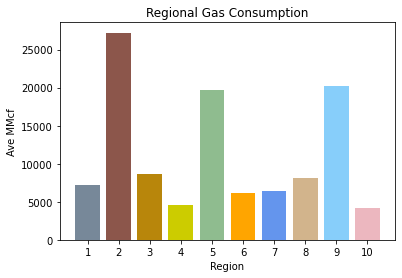

In [15]:
plt.bar(reg_name, reg_CCmf, color=["lightslategrey","tab:brown","darkgoldenrod","#CCCC00","darkseagreen","orange","cornflowerblue",'tan','lightskyblue','#ecb7bf'])
plt.ylabel('Ave MMcf')
plt.xlabel('Region')
plt.title("Regional Gas Consumption")
plt.show()

# Looking at gas consumption by season

In [16]:
combined_df[['Year','Month']]= combined_df.Date.str.split("-",expand=True)
combined_df

,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly,Year,Month
0,2010-01,Alabama,9202.647,40.0,-4.9,2010,01
1,2010-02,Alabama,7762.261,40.6,-9.2,2010,02
2,2010-03,Alabama,6612.051,51.2,-5.0,2010,03
3,2010-04,Alabama,2987.217,64.2,0.3,2010,04
4,2010-05,Alabama,1142.784,73.3,1.7,2010,05
...,...,...,...,...,...,...,...
5875,2019-08,Wyoming,212.409,64.9,0.3,2019,08
5876,2019-09,Wyoming,189.987,56.7,0.1,2019,09
5877,2019-10,Wyoming,589.805,34.2,-8.9,2019,10
5878,2019-11,Wyoming,1847.274,30.2,-0.9,2019,11


In [17]:
spring_loc= combined_df.loc[(combined_df['Month']== '03')|(combined_df['Month']== '04')|(combined_df['Month']== '05')]
summer_loc=  combined_df.loc[(combined_df['Month']== '06')|(combined_df['Month']== '07')|(combined_df['Month']== '08')]
fall_loc=  combined_df.loc[(combined_df['Month']== '09')|(combined_df['Month']== '10')|(combined_df['Month']== '11')]
winter_loc=  combined_df.loc[(combined_df['Month']== '12')|(combined_df['Month']== '01')|(combined_df['Month']== '02')]

In [18]:
spring = spring_loc['Natural Gas Consumption (MMcf)'].mean()
summer = summer_loc['Natural Gas Consumption (MMcf)'].mean()
fall = fall_loc['Natural Gas Consumption (MMcf)'].mean()
winter = winter_loc['Natural Gas Consumption (MMcf)'].mean()

In [19]:
season_name=("Spring","Summer","Fall","Winter")
season_MMcf=([spring, summer, fall, winter])

In [20]:
season_df= pd.DataFrame({"Season":season_name,"Ave MMcF":season_MMcf})
season_df

,Season,Ave MMcF
0,Spring,7613.320118
1,Summer,2310.646471
2,Fall,5564.491110
3,Winter,16405.638815


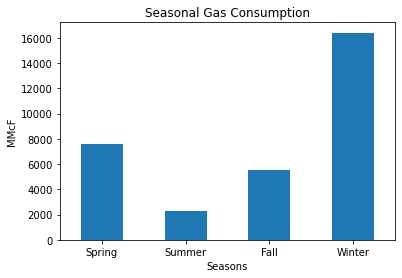

In [21]:
season_bar = season_df.plot.bar(legend=False, title= "Seasonal Gas Consumption",rot=0)
xlabel = season_bar.set_xlabel("Seasons")
ylabel = season_bar.set_ylabel("MMcF")
tick_labels = season_bar.set_xticklabels(season_name)

In [22]:
#doing groubpy for boxplot

spring_box_data = spring_loc['Natural Gas Consumption (MMcf)']
summer_box_data = summer_loc['Natural Gas Consumption (MMcf)']
fall_box_data = fall_loc['Natural Gas Consumption (MMcf)']
winter_box_data = winter_loc['Natural Gas Consumption (MMcf)']

In [23]:
ss_box_df= pd.DataFrame({"Spring":spring_box_data, "Summer":summer_box_data, "Fall": fall_box_data, "Winter": winter_box_data})
ss_box_df.fillna(" ")

,Spring,Summer,Fall,Winter
0,,,,9202.65
1,,,,7762.26
2,6612.05,,,
3,2987.22,,,
4,1142.78,,,
...,...,...,...,...
5875,,212.409,,
5876,,,189.987,
5877,,,589.805,
5878,,,1847.27,


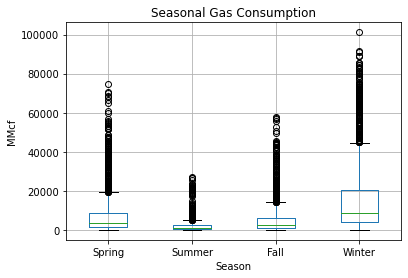

In [24]:
season_box=ss_box_df.boxplot()
title = season_box.set_title("Seasonal Gas Consumption")
xlabel = season_box.set_xlabel("Season")
ylabel = season_box.set_ylabel("MMcf")

Text(0.5, 1.0, 'Average Gas Consumption vs Average Temperature per State')

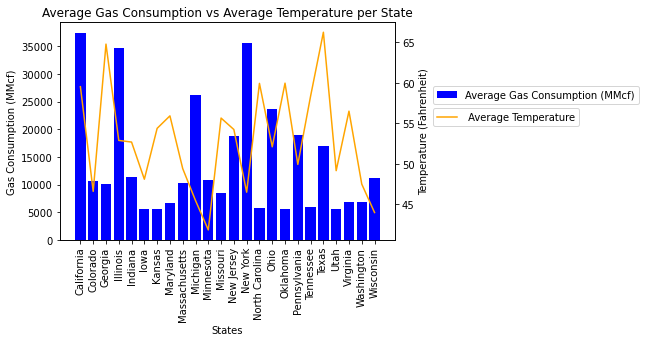

In [25]:
#ax = data_plot.add_subplot()
fig,ax1 = plt.subplots()
ax1.bar(state_mean.index, state_mean["Natural Gas Consumption (MMcf)"], color = 'blue', label="Average Gas Consumption (MMcf)")

ax1.set_xlabel("States")
ax1.set_ylabel("Gas Consumption (MMcf)")
plt.legend(loc='lower left', bbox_to_anchor=(1.1, 0.6))
ax2 = ax1.twinx()


ax2.set_ylabel("Temperature (Fahrenheit)")

ax2.plot(state_mean.index, state_mean[" Average Temperature"], color="orange", label = " Average Temperature")
plt.legend(loc='lower left', bbox_to_anchor=(1.1, 0.5))
ax1.tick_params(axis='x', rotation=90)
plt.title("Average Gas Consumption vs Average Temperature per State")

# Looking at Gas Consumption Over Time

<AxesSubplot:title={'center':'National Average Gas Consumed Over 10 Years'}, xlabel='Date'>

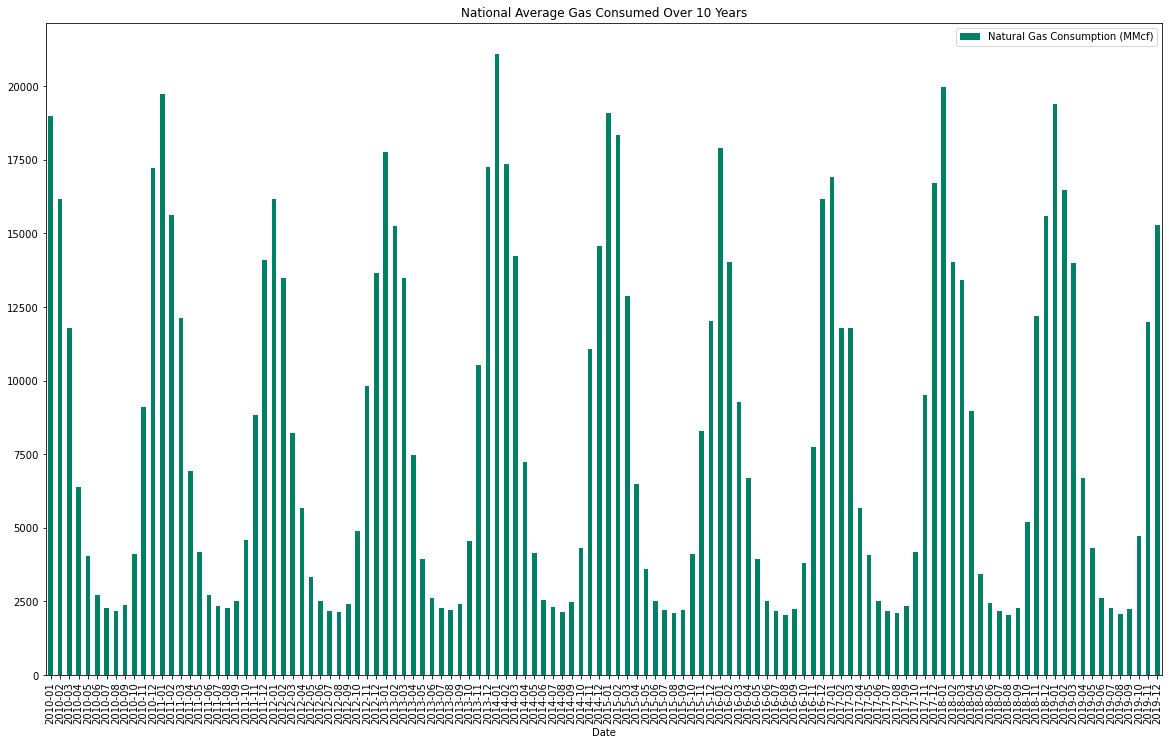

In [26]:
# adding bar graph of the average Gas Consumption for all states over time 
date_df = combined_df.groupby('Date').mean()
date_df.plot(kind='bar', y= 'Natural Gas Consumption (MMcf)', figsize =(20,12), title= "National Average Gas Consumed Over 10 Years", colormap='summer')

# Identifying Most Extreme and Least Extreme States

In [28]:
#adding a difference column to the dataframe # Note: Commented out to ensure no further changes to data frame
# weather2_df = combined_df.copy()
# weather2_df.loc[-1] = ['NaN', 'NaN', 'NaN', 'NaN','NaN','NaN','NaN']  # adding a row
# weather2_df.index = weather2_df.index + 1  # shifting index
# weather2_df.sort_index(inplace=True)
weather2_df

,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly,Year,Month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01,Alabama,9202.65,40,-4.9,2010,01
2,2010-02,Alabama,7762.26,40.6,-9.2,2010,02
3,2010-03,Alabama,6612.05,51.2,-5,2010,03
4,2010-04,Alabama,2987.22,64.2,0.3,2010,04
...,...,...,...,...,...,...,...
5876,2019-08,Wyoming,212.409,64.9,0.3,2019,08
5877,2019-09,Wyoming,189.987,56.7,0.1,2019,09
5878,2019-10,Wyoming,589.805,34.2,-8.9,2019,10
5879,2019-11,Wyoming,1847.27,30.2,-0.9,2019,11


In [33]:
#creating a dataframe to subtract- Note I only needed the code to run once so I commented out the section to minimize the dataframe changes. 
weathersubtract_df = combined_df.copy()
weathersubtract_df

,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly,Year,Month
0,2010-01,Alabama,9202.647,40.0,-4.9,2010,01
1,2010-02,Alabama,7762.261,40.6,-9.2,2010,02
2,2010-03,Alabama,6612.051,51.2,-5.0,2010,03
3,2010-04,Alabama,2987.217,64.2,0.3,2010,04
4,2010-05,Alabama,1142.784,73.3,1.7,2010,05
...,...,...,...,...,...,...,...
5875,2019-08,Wyoming,212.409,64.9,0.3,2019,08
5876,2019-09,Wyoming,189.987,56.7,0.1,2019,09
5877,2019-10,Wyoming,589.805,34.2,-8.9,2019,10
5878,2019-11,Wyoming,1847.274,30.2,-0.9,2019,11


In [34]:
#creating a dataframe to subtract- Note I only needed the code to run once so I commented out the section to minimize the dataframe changes. 
weathersubtract_df.loc[5881] = ['NaN', 'NaN', 'NaN', 'NaN','NaN', 'NaN', 'NaN']  # adding a row
weathersubtract_df

,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly,Year,Month
0,2010-01,Alabama,9202.65,40,-4.9,2010,01
1,2010-02,Alabama,7762.26,40.6,-9.2,2010,02
2,2010-03,Alabama,6612.05,51.2,-5,2010,03
3,2010-04,Alabama,2987.22,64.2,0.3,2010,04
4,2010-05,Alabama,1142.78,73.3,1.7,2010,05
...,...,...,...,...,...,...,...
5876,2019-09,Wyoming,189.987,56.7,0.1,2019,09
5877,2019-10,Wyoming,589.805,34.2,-8.9,2019,10
5878,2019-11,Wyoming,1847.27,30.2,-0.9,2019,11
5879,2019-12,Wyoming,2073.95,23,1.4,2019,12


In [43]:
#removing text columns from offsetting dataframe so that I can subtract dataframes later. can only perform when dataframe has all values.  
# weathersubtract_df.drop(['Date'], axis =1, inplace=True)
# weathersubtract_df.drop(['State'], axis =1, inplace=True)
# weathersubtract_df.drop(['Year'], axis =1, inplace=True)
# weathersubtract_df.drop(['Month'], axis =1, inplace=True)
# weathersubtract_df.drop(['Natural Gas Consumption (MMcf)'], axis =1, inplace=True)
weathersubtract_df


,Average Temperature,Anomaly
0,40,-4.9
1,40.6,-9.2
2,51.2,-5
3,64.2,0.3
4,73.3,1.7
...,...,...
5876,56.7,0.1
5877,34.2,-8.9
5878,30.2,-0.9
5879,23,1.4


In [46]:
#removing text columns from offsetting dataframe so that I can subtract dataframes later. can only perform when dataframe has all values.  
weather2_df.drop(['Date'], axis =1, inplace=True)
weather2_df.drop(['State'], axis =1, inplace=True)
weather2_df.drop(['Year'], axis =1, inplace=True)
weather2_df.drop(['Month'], axis =1, inplace=True)
weather2_df.drop(['Natural Gas Consumption (MMcf)'], axis =1, inplace=True)
weather2_df

,Average Temperature,Anomaly
0,NaN,NaN
1,40,-4.9
2,40.6,-9.2
3,51.2,-5
4,64.2,0.3
...,...,...
5876,64.9,0.3
5877,56.7,0.1
5878,34.2,-8.9
5879,30.2,-0.9


In [47]:
# update the first and last columns to be duplicative and not text values
weather2_df.loc[0] = [40, -4.9]  
weathersubtract_df.loc[5881] = [ 23, 1.4]  


In [58]:
#reset index for offsetting data frame to obtain difference
weathersubtract_df.reset_index(inplace=True)
weathersubtract_df.drop(['level_0'], axis =1, inplace=True)
weathersubtract_df.drop(['index'], axis =1, inplace=True)

weathersubtract_df

,Average Temperature,Anomaly
0,40,-4.9
1,40.6,-9.2
2,51.2,-5
3,64.2,0.3
4,73.3,1.7
...,...,...
5876,56.7,0.1
5877,34.2,-8.9
5878,30.2,-0.9
5879,23,1.4


In [49]:
#reset index for offsetting data frame to obtain difference
weather2_df.reset_index(inplace=True)
weather2_df

,index,Average Temperature,Anomaly
0,0,40,-4.9
1,1,40,-4.9
2,2,40.6,-9.2
3,3,51.2,-5
4,4,64.2,0.3
...,...,...,...
5876,5876,64.9,0.3
5877,5877,56.7,0.1
5878,5878,34.2,-8.9
5879,5879,30.2,-0.9


In [59]:
#subtract the dataframes, drop unnecessary columns, and change column names
temp_difference_df = weather2_df.subtract(weathersubtract_df, axis=1)
temp_difference_df.rename(columns = {' Average Temperature':'Temperature Difference'}, inplace = True)
temp_difference_df.rename(columns = {'Anomaly':'Anomaly Difference'}, inplace = True)
temp_difference_df.drop(['index'], axis =1, inplace=True)
temp_difference_df

,Temperature Difference,Anomaly Difference
0,0,0
1,-0.6,4.3
2,-10.6,-4.2
3,-13,-5.3
4,-9.1,-1.4
...,...,...
5876,8.2,0.2
5877,22.5,9
5878,4,-8
5879,7.2,-2.3


In [62]:
#Merging the differences to a new weather dataframe, reset index, and adding the additional row for comparison purposes

# commenting out as only needs to occur once. 
weatherfinal_df = combined_df.copy()
weatherfinal_df.loc[-1] = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']  # adding a row
weatherfinal_df.index = weatherfinal_df.index + 1  # shifting index
weatherfinal_df.sort_index(inplace=True)
weatherfinal_df.reset_index(inplace=True)
weatherfinal_df 

weatherfinalmerge_df = weatherfinal_df.join(temp_difference_df)
weatherfinalmerge_df

,index,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly,Year,Month,Temperature Difference,Anomaly Difference
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,2010-01,Alabama,9202.65,40,-4.9,2010,01,-0.6,4.3
2,2,2010-02,Alabama,7762.26,40.6,-9.2,2010,02,-10.6,-4.2
3,3,2010-03,Alabama,6612.05,51.2,-5,2010,03,-13,-5.3
4,4,2010-04,Alabama,2987.22,64.2,0.3,2010,04,-9.1,-1.4
...,...,...,...,...,...,...,...,...,...,...
5876,5876,2019-08,Wyoming,212.409,64.9,0.3,2019,08,8.2,0.2
5877,5877,2019-09,Wyoming,189.987,56.7,0.1,2019,09,22.5,9
5878,5878,2019-10,Wyoming,589.805,34.2,-8.9,2019,10,4,-8
5879,5879,2019-11,Wyoming,1847.27,30.2,-0.9,2019,11,7.2,-2.3


In [63]:
# Needs to replace the data for the 12/2019 Average Temperature_subtract as it is finding the difference between december of one state and december of another state. This value should be zero. 
# finding indices where 12/2019 exists
print(weatherfinalmerge_df[weatherfinalmerge_df['Date']=='2019-12'].index.values)

[ 120  240  360  480  600  720  840  960 1080 1200 1320 1440 1560 1680
 1800 1920 2040 2160 2280 2400 2520 2640 2760 2880 3000 3120 3240 3360
 3480 3600 3720 3840 3960 4080 4200 4320 4440 4560 4680 4800 4920 5040
 5160 5280 5400 5520 5640 5760 5880]


In [64]:
# cont. JMJ needs to replace the data for the 12/2019 Average Temperature_subtract as it is finding the difference between december of one state and december of another state. This value should be zero.
#updating all instances 
weatherfinalmerge_df.loc[120,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[240,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[360,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[480,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[600,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[720,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[840,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[960,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[1080,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[1200,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[1320,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[1440,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[1560,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[1680,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[1800,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[1920,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[2040,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[2160,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[2280,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[2400,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[2520,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[2640,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[2760,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[2880,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3000,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3120,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3240,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3360,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3480,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3600,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3720,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3840,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[3960,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[4080,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[4200,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[4320,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[4440,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[4560,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[4680,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[4800,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[4920,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[5040,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[5160,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[5280,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[5400,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[5520,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[5640,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[5760,('Temperature Difference')] = 0
weatherfinalmerge_df.loc[5880,('Temperature Difference')] = 0

weatherfinalmerge_df

,index,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly,Year,Month,Temperature Difference,Anomaly Difference
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,2010-01,Alabama,9202.65,40,-4.9,2010,01,-0.6,4.3
2,2,2010-02,Alabama,7762.26,40.6,-9.2,2010,02,-10.6,-4.2
3,3,2010-03,Alabama,6612.05,51.2,-5,2010,03,-13,-5.3
4,4,2010-04,Alabama,2987.22,64.2,0.3,2010,04,-9.1,-1.4
...,...,...,...,...,...,...,...,...,...,...
5876,5876,2019-08,Wyoming,212.409,64.9,0.3,2019,08,8.2,0.2
5877,5877,2019-09,Wyoming,189.987,56.7,0.1,2019,09,22.5,9
5878,5878,2019-10,Wyoming,589.805,34.2,-8.9,2019,10,4,-8
5879,5879,2019-11,Wyoming,1847.27,30.2,-0.9,2019,11,7.2,-2.3


In [65]:
#Adding absolute value for the total variance between temperatures for each state. 
temp_df = weatherfinalmerge_df.groupby('State').agg({'Temperature Difference': lambda x: x.abs().sum()})
temp_df

,Temperature Difference
State,
Alabama,748.1
Alaska,1100.4
Arizona,795.6
Arkansas,847.6
California,683.0
Colorado,879.8
Connecticut,944.3
Delaware,911.4
Florida,540.2


In [66]:
#sorting values by least to most extreme temperature changes
temp_df.sort_values(by=['Temperature Difference'])

,Temperature Difference
State,
NaN,0.0
Florida,540.2
California,683.0
Louisiana,695.1
Georgia,721.9
Oregon,743.3
Alabama,748.1
Mississippi,752.5
Washington,752.8


# Creating Plot for Most Extreme State >5000 MMcf & Least Extreme State > 5000MMcf

In [67]:
#copying database for new instance
extreme_df = combined_df.copy()
extreme_df

,Date,State,Natural Gas Consumption (MMcf),Average Temperature,Anomaly,Year,Month
0,2010-01,Alabama,9202.647,40.0,-4.9,2010,01
1,2010-02,Alabama,7762.261,40.6,-9.2,2010,02
2,2010-03,Alabama,6612.051,51.2,-5.0,2010,03
3,2010-04,Alabama,2987.217,64.2,0.3,2010,04
4,2010-05,Alabama,1142.784,73.3,1.7,2010,05
...,...,...,...,...,...,...,...
5875,2019-08,Wyoming,212.409,64.9,0.3,2019,08
5876,2019-09,Wyoming,189.987,56.7,0.1,2019,09
5877,2019-10,Wyoming,589.805,34.2,-8.9,2019,10
5878,2019-11,Wyoming,1847.274,30.2,-0.9,2019,11


<AxesSubplot:title={'center':'California Gas Usage Over Time'}, xlabel='Date', ylabel='Average Natural Gas Consumption'>

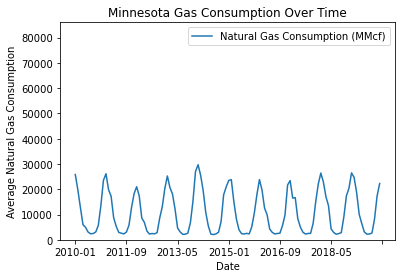

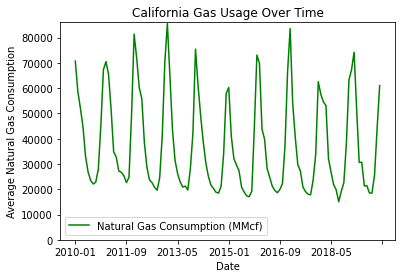

In [68]:
#Creating dataframe for and ploting the most and least extreme weather states with gas usage > 5000 mmcF

#identify California data and drop extra columns
California_data = extreme_df.loc[extreme_df['State']=='California']
California_data.drop([' Average Temperature'], axis =1)
California_data.drop(['Anomaly'], axis =1)

#identify Minnesota data and drop extra columns
Minnesota_data = extreme_df.loc[extreme_df['State']=='Minnesota']
Minnesota_data.drop([' Average Temperature'], axis =1)
Minnesota_data.drop(['Anomaly'], axis =1)

#plot Minnesota and California lines separately
Minnesota_data.plot.line(x='Date', y='Natural Gas Consumption (MMcf)', title = 'Minnesota Gas Consumption Over Time',ylabel = 'Average Natural Gas Consumption', ylim = (0,86000))
California_data.plot.line(x='Date', y='Natural Gas Consumption (MMcf)', color='green', title = 'California Gas Usage Over Time', ylabel = 'Average Natural Gas Consumption',ylim = (0,86000))
